## 📂 1. Proje Açıklaması (Markdown hücresi)

# 🧠 Brain MRI ile Tümör Tespiti
Bu proje, MRI beyin görüntülerini kullanarak tümör varlığı tespit etmeyi amaçlamaktadır.
Makine öğrenmesi kapsamında **Gözetimli Öğrenme (Supervised Learning)** tekniklerinden **CNN (Convolutional Neural Networks)** kullanılmıştır.
Veri seti: [Kaggle - Brain MRI Images for Brain Tumor Detection](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)


# 📦 2. Kütüphanelerin Yüklenmesi

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Bu projede kullanılan kütüphaneler, temel olarak dört ana grupta toplanabilir: Dosya ve Sayısal İşlem Kütüphaneleri, Görselleştirme Kütüphaneleri, Makine Öğrenmesi Araçları ve Derin Öğrenme Modülleri. os ve numpy, sırasıyla dosya/klasör yönetimi ve çok boyutlu sayısal işlemler için kullanılır. Görsel analiz ve sunumlar için matplotlib.pyplot genel grafik çizimleri, seaborn ise istatistiksel görselleştirme araçları sunar. Görüntü işlemleri için PIL.Image modülü kullanılarak resimler açılır, yeniden boyutlandırılır ve dönüştürülür. Makine öğrenmesi işlemlerinde scikit-learn içinden gelen train_test_split veriyi eğitim ve test kümelerine ayırırken; classification_report ve confusion_matrix model başarımını değerlendirmek için kullanılır. Derin öğrenme tarafında, tensorflow çatısı altında yer alan Sequential model ile sıralı yapıda sinir ağları oluşturulur. Bu modelde kullanılan katmanlar arasında Conv2D (özellik çıkarımı), MaxPooling2D (boyut küçültme), Flatten (veriyi düzleştirme), Dense (tam bağlantı) ve Dropout (aşırı öğrenmeyi engelleme) bulunur. Ayrıca ImageDataGenerator veri artırımı yoluyla modelin genelleme kabiliyetini geliştirirken, EarlyStopping doğrulama kaybı durakladığında eğitimi erken sonlandırarak verimliliği artırır. Tüm bu kütüphaneler bir araya geldiğinde, görsel verilerle çalışan güçlü ve esnek bir sınıflandırma modeli oluşturulabilir.

# 🖼️ 3. Veri Yükleme ve Görselleştirme

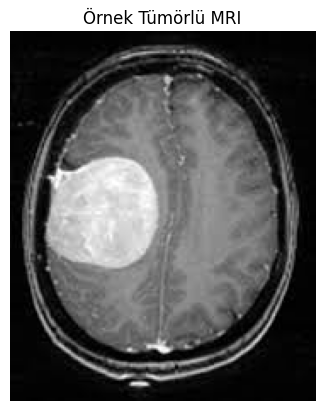

In [7]:
# Veri dizinleri
data_dir =  r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\yes"
no_tumor_dir =  r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\no"

# Sadece görselleri filtrele (örn. .jpg uzantılı olanlar)
valid_images = [f for f in os.listdir(data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Örnek görsel gösterimi
example_image = Image.open(os.path.join(data_dir, valid_images[0]))
plt.imshow(example_image)
plt.title("Örnek Tümörlü MRI")
plt.axis("off")
plt.show()


# 🧹 4. Veri Ön İşleme

In [38]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Veri klasörleri
tumor_dir = r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\yes"
no_tumor_dir = r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\no"
IMG_SIZE = 100  # Görsel boyutu

data = []
labels = []

# Görsel okuma fonksiyonu
def load_images_from_folder(folder, label):
    for img in os.listdir(folder):
        if img.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(folder, img)
                img_array = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE)).convert('L')
                data.append(np.array(img_array))
                labels.append(label)
            except Exception as e:
                print(f"Hata: {img_path} dosyası işlenemedi. {e}")

# Tümörlü: 1, Tümörsüz: 0
load_images_from_folder(tumor_dir, 1)
load_images_from_folder(no_tumor_dir, 0)

# NumPy dizilerine çevir
data = np.array(data)
labels = np.array(labels)

# Normalizasyon (0-255 → 0-1)
data = data / 255.0

# CNN'e uygun boyut (örnek: 100x100x1)
data = data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Eğitim/Test ayırımı
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Kontrol
print(f"Toplam görüntü: {len(data)}")
print(f"Train şekli: {X_train.shape}, Test şekli: {X_test.shape}")


Toplam görüntü: 253
Train şekli: (202, 100, 100, 1), Test şekli: (51, 100, 100, 1)


Bu kod parçası, tümörlü ve tümörsüz beyin MRI görüntülerini işleyerek derin öğrenme modeline uygun hale getirmek için hazırlanmıştır. Öncelikle gerekli kütüphaneler yüklenir ve tümörlü (yes) ve tümörsüz (no) klasör yolları tanımlanır. Görsellerin her biri 100x100 boyutuna getirilip gri tonlamaya çevrilir ve sayısal olarak dizi haline getirilir. load_images_from_folder fonksiyonu, klasörlerdeki resimleri okuyarak bunları data listesine, etiketlerini (1 veya 0) labels listesine ekler. Daha sonra bu veriler NumPy dizisine dönüştürülerek 0-1 aralığına normalize edilir ve CNN modeline uygun olacak şekilde (örnek sayısı, yükseklik, genişlik, kanal) formatına getirilir. Son adımda, veriler eğitim ve test olarak %80-%20 oranında ayrılır. Böylece model eğitimi için hazır, temizlenmiş ve dengeli bir veri kümesi elde edilmiş olur.

# 🧠 Model Mimarisi:

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\fatma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Bu model, siyah-beyaz beyin MRI görüntüleri üzerinde tümör var mı yok mu şeklinde ikili (binary) sınıflandırma yapmak için oluşturulmuş bir evrişimli sinir ağıdır (CNN). Modelin ilk katmanı, 32 filtreli bir Conv2D katmanıdır; bu, 3x3 boyutundaki filtrelerle görüntüdeki temel özellikleri (kenar, doku vb.) yakalar. Hemen ardından gelen MaxPooling2D katmanı, boyutu yarıya indirerek veriyi sadeleştirir ve hesaplama yükünü azaltır. Aynı yapı, 64 filtreli ikinci bir evrişim ve havuzlama katmanıyla tekrarlanır, böylece daha karmaşık özellikler çıkarılır. Ardından, Flatten katmanı veriyi düzleştirerek tam bağlantılı (Dense) katmanlara aktarır. Bu katmanlardan ilki 128 nörona sahip olup aktivasyon olarak ReLU kullanır; ardından gelen Dropout(0.5) katmanı ise aşırı öğrenmeyi (overfitting) engellemek için %50 oranında rastgele nöronları kapatır. Son olarak Dense(1, activation='sigmoid') katmanı, çıktıyı 0 ile 1 arasında bir değere çevirerek tümör var/yok kararını verir.

# ⚙️ Derleme ve Eğitim

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping: overfitting önleme
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Eğitimi başlat
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=15, 
                    batch_size=32, 
                    callbacks=[early_stop])


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.6284 - loss: 0.8506 - val_accuracy: 0.4878 - val_loss: 0.7183
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6664 - loss: 0.6230 - val_accuracy: 0.8049 - val_loss: 0.5172
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7841 - loss: 0.5297 - val_accuracy: 0.6341 - val_loss: 0.6484
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7221 - loss: 0.5801 - val_accuracy: 0.8293 - val_loss: 0.4306
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7462 - loss: 0.5218 - val_accuracy: 0.8293 - val_loss: 0.3863
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7344 - loss: 0.5299 - val_accuracy: 0.7317 - val_loss: 0.5765
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7358 - loss: 0.5701 - val_accuracy: 0.6829 - val_loss: 0.6244
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7822 - loss: 0.4902 - val_accuracy: 0.8293 - val_loss:

Bu kod, oluşturulan CNN modelini derleyip eğitmek için kullanılır. İlk olarak model.compile() fonksiyonu ile modelin nasıl optimize edileceği belirlenir; burada adam algoritması, ağırlıkları güncellemek için kullanılırken, ikili sınıflandırma problemi olduğu için kayıp fonksiyonu olarak binary_crossentropy seçilmiştir. Başarım ölçütü olarak da accuracy yani doğruluk oranı kullanılır. Daha sonra, EarlyStopping callback'i tanımlanır. Bu, modelin doğrulama (val_loss) kaybı 3 ardışık epoch boyunca iyileşmezse eğitimi durdurur ve en iyi ağırlıkları geri yükler; bu da aşırı öğrenmeyi (overfitting) önlemeye yardımcı olur. Son olarak model.fit() fonksiyonu ile model eğitilir: eğitim verisinin %20’si doğrulama için ayrılır, eğitim 15 epoch boyunca devam eder, her seferinde 32 görüntüden oluşan mini-batch'ler ile öğrenme yapılır ve eğitim sürecinde early_stop devrede olur. Bu sayede model hem verimli hem de kontrollü bir şekilde eğitilmiş olur.

# 📈 Eğitim Sonrası Görselleştirme 

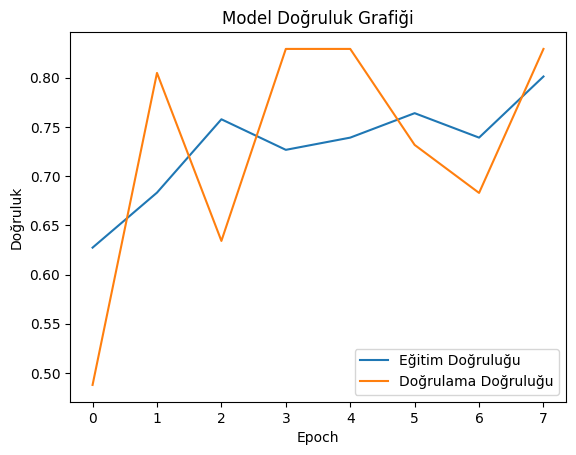

In [14]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title("Model Doğruluk Grafiği")
plt.show()

Bu kod bloğu, model eğitimi sırasında elde edilen doğruluk (accuracy) verilerini çizerek eğitim performansını görselleştirir. history.history['accuracy'], her bir epoch sonunda elde edilen eğitim doğruluklarını içerirken; history.history['val_accuracy'], doğrulama verisinde elde edilen doğrulukları tutar. plt.plot() fonksiyonu ile bu iki değer ayrı ayrı çizilir. X ekseni epoch sayılarını, Y ekseni ise doğruluk oranlarını gösterir. plt.xlabel() ve plt.ylabel() ile eksen isimleri verilir, plt.legend() ile hangi çizginin neyi temsil ettiği belirtilir. plt.title() grafiğe başlık ekler ve plt.show() komutu ile grafik ekranda gösterilir. Bu grafik, modelin öğrenme sürecinde nasıl performans gösterdiğini anlamak için oldukça yararlıdır; özellikle eğitim ve doğrulama doğruluğu arasında fark varsa overfitting (aşırı öğrenme) olup olmadığını görmeyi sağlar.



# 🔍 Test Verisi ile Tahmin ve Değerlendirme

In [16]:
# Test verisinde tahmin yap
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Bu kod, eğitilen modeli kullanarak test verisi üzerindeki tahminleri yapar. model.predict(X_test) fonksiyonu, test verisindeki her örnek için 0 ile 1 arasında olasılık değerleri üretir; bu değerler modelin “tümör var” (1) olasılığıdır. Daha sonra, y_pred_probs > 0.5 ifadesiyle bu olasılıklar 0.5 eşik değeri ile karşılaştırılır; yani 0.5’in üzerindeyse tahmin 1 (tümörlü), altında ise 0 (tümörsüz) olarak sınıflandırılır. Son olarak astype("int32") ile tahminler tam sayıya çevrilir ve flatten() ile tek boyutlu dizi haline getirilir. Böylece test verisi için net tahmin sonuçları elde edilir.

# 📊 Karışıklık Matrisi (Confusion Matrix)

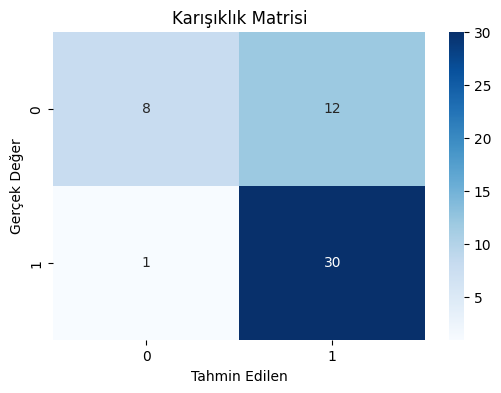

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Karışıklık Matrisi')
plt.show()

Bu kod, modelin test verisi üzerindeki performansını değerlendirmek için karışıklık matrisini (confusion matrix) oluşturup görselleştirir. İlk olarak confusion_matrix(y_test, y_pred) fonksiyonu, gerçek (y_test) ve modelin tahmin ettiği (y_pred) sınıflar arasındaki doğru ve yanlış sınıflandırmaları sayısal olarak hesaplar. Daha sonra, seaborn kütüphanesi kullanılarak heatmap şeklinde görselleştirilir. Grafik üzerinde her hücredeki sayı gösterilir (annot=True), sayılar tam sayı formatındadır (fmt='d'), ve renk tonu mavi tonlarında seçilmiştir (cmap='Blues'). X ekseni tahmin edilen sınıfları, Y ekseni ise gerçek sınıfları belirtir. Grafiğin başlığı "Karışıklık Matrisi" olarak atanır. Bu grafik sayesinde modelin hangi sınıflarda başarılı, hangi sınıflarda hata yaptığı kolayca anlaşılır.

# 🧮 Sınıflandırma Raporu (Accuracy, Precision, Recall, F1 Score)

In [19]:
report = classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor'])
print(report)

              precision    recall  f1-score   support

    No Tumor       0.89      0.40      0.55        20
       Tumor       0.71      0.97      0.82        31

    accuracy                           0.75        51
   macro avg       0.80      0.68      0.69        51
weighted avg       0.78      0.75      0.72        51



Bu kod, modelin test verisi üzerindeki sınıflandırma başarımını detaylı olarak gösterir. classification_report fonksiyonu, gerçek etiketler (y_test) ile modelin tahminleri (y_pred) karşılaştırılarak her sınıf için doğruluk (precision), geri çağırma (recall), F1-skora ve destek (desteklenen örnek sayısı) gibi önemli performans metriklerini hesaplar. target_names parametresi ile sınıf isimleri “No Tumor” ve “Tumor” olarak etiketlenir, böylece rapor daha okunabilir olur. Sonuç olarak, bu rapor modelin her sınıfta ne kadar başarılı olduğunu ayrıntılı şekilde gösterir ve ekrana yazdırılır.

# 🧪 BONUS: Gözetimsiz Öğrenme - k-Means Kümeleme

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

sklearn.cluster.KMeans: Verileri önceden belirlenmiş sayıda kümelere (cluster) ayırmak için kullanılan bir kümeleme algoritmasıdır. Örneğin, benzer veri noktalarını gruplayarak örüntüler keşfetmek için kullanılır.

sklearn.decomposition.PCA: Principal Component Analysis (Temel Bileşen Analizi) anlamına gelir. Yüksek boyutlu verileri daha düşük boyutlara indirgemek için kullanılan bir tekniktir. Böylece verinin temel özellikleri korunarak görselleştirme ve hızlandırma sağlanır.

numpy: Sayısal hesaplamalar ve dizi işlemleri için kullanılan temel Python kütüphanesidir. Veri üzerinde matematiksel işlemler yapmayı kolaylaştırır.

### 1. Veri ve etiketleri numpy dizilerine çevir:
### 2. Şekillerini kontrol et (örnek):

In [24]:
X = np.array(data)  # data daha önceki kodda tüm görüntü dizilerini içeriyor
y = np.array(labels)  # labels da etiketler (0/1)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (253, 100, 100, 1)
y shape: (253,)


Bu kodda, daha önce toplanmış ve işlenmiş görüntü verileri data ve bunların etiketleri labels NumPy dizilerine (np.array) dönüştürülüyor. Böylece, X değişkeni tüm görüntülerin sayısal temsilini, y ise her görüntünün ait olduğu sınıf etiketini içeriyor. print komutlarıyla da bu dizilerin boyutları ekrana yazdırılıyor. Bu, verinin doğru şekilde hazırlandığını ve model eğitimi için uygun formatta olduğunu kontrol etmek için yapılır.

### 3. Gri tonlu görüntülerin CNN için (IMG_SIZE, IMG_SIZE, 1) formatında olması gerekir.
Eğer X 3 boyutluysa (örneğin (2400, 150, 150)) bunu 4 boyuta çıkar:

In [25]:
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X dizisi, burada reshape fonksiyonu kullanılarak CNN modeline uygun hale getiriliyor. Görüntüler başlangıçta düzleştirilmiş veya farklı bir formatta olabilir; bu kod ile her örnek (IMG_SIZE, IMG_SIZE, 1) boyutlarına dönüştürülür. Burada -1 ifadesi, NumPy’ya örnek sayısını otomatik belirlemesini söyler, IMG_SIZE görüntülerin genişlik ve yüksekliğini (örneğin 100x100), 1 ise kanal sayısını (gri tonlama için tek kanal) ifade eder. Böylece, CNN modeli için uygun dört boyutlu bir tensör (örnek sayısı, yükseklik, genişlik, kanal) oluşturulmuş olur.

Ama gözetimsiz öğrenmede düzleştirmek için 2D şekil (num_samples, height*width) lazım.
O yüzden:

In [26]:
X_flat = X.reshape(len(X), -1)

X dizisi, yani çok boyutlu görüntü verisi, reshape fonksiyonu ile 2 boyutlu hale getiriliyor. len(X) ifadesi toplam örnek sayısını belirtirken, -1 ise kalan tüm boyutların tek bir uzun vektöre dönüştürülmesini sağlar. Böylece her görüntü, tek bir satırda tüm piksel değerlerini içeren bir vektöre dönüştürülür. Bu işlem, örneğin PCA veya KMeans gibi algoritmaların çalışması için genellikle gereklidir çünkü bu algoritmalar genellikle 2 boyutlu (örnek sayısı × özellik sayısı) veri bekler.

# 🧹 Adım 1: Görselleri Vektör Formatına Getir

In [27]:
# Görselleri 1D hale getiriyoruz (her resmi düzleştir)
X_flat = X.reshape(len(X), -1)
print("Yeni şekli:", X_flat.shape)

Yeni şekli: (253, 10000)


Bu kodda, çok boyutlu olan görüntü verileri (örnek sayısı, yükseklik, genişlik, kanal) reshape ile tek boyutlu hale getiriliyor. Yani her bir resim, piksellerinin tümü yan yana dizilerek uzun bir vektöre dönüştürülüyor. Böylece X_flat dizisi, her satırda bir görüntünün düzleştirilmiş halini içeriyor. print komutu ise bu yeni dizinin boyutlarını ekrana yazdırıyor. Bu dönüşüm, özellikle PCA veya KMeans gibi algoritmaların kullanılması için gereklidir çünkü bu algoritmalar genellikle 2 boyutlu (örnek sayısı × özellik sayısı) formatında veri ister.

# 🧠 Adım 2: PCA ile Boyut Azaltma (Opsiyonel ama görselleştirme için önerilir)

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

Bu kod, yüksek boyutlu görüntü verilerini 2 boyutlu hale indirgemek için PCA (Temel Bileşen Analizi) yöntemini kullanır. Öncelikle PCA(n_components=2) ile verinin iki ana bileşene (boyuta) indirgenmesi istenir. Sonrasında fit_transform(X_flat) fonksiyonu ile hem PCA modeli veriye uyarlanır (fit edilir) hem de verinin boyutları ikiye indirilir (transform edilir). Böylece, çok sayıda piksel değeri içeren her görüntü, artık sadece 2 özellikli (2D koordinatlı) bir veri noktası olarak temsil edilir. Bu, veriyi görselleştirmek veya daha hızlı işlem yapmak için oldukça faydalıdır.

# 📊 Adım 3: k-Means ile Kümeleme

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
labels_kmeans = kmeans.labels_

C:\Users\fatma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Bu kod, KMeans kümeleme algoritması kullanarak PCA ile indirgenmiş veriyi iki kümeye (cluster) ayırır. KMeans(n_clusters=2, random_state=42) ile iki küme oluşturulacağı belirtilir ve rastgelelik kontrolü için random_state sabitlenir. kmeans.fit(X_pca) ile algoritma PCA sonucu elde edilen 2 boyutlu veriye uygulanır ve veriler benzer özelliklerine göre iki gruba ayrılır. Sonrasında kmeans.labels_ dizisi, her veri noktasının hangi kümeye ait olduğunu gösteren etiketleri tutar. Böylece, veri kümesindeki örüntüler keşfedilmiş olur.

# 🖼️ Adım 4: Görselleştirme

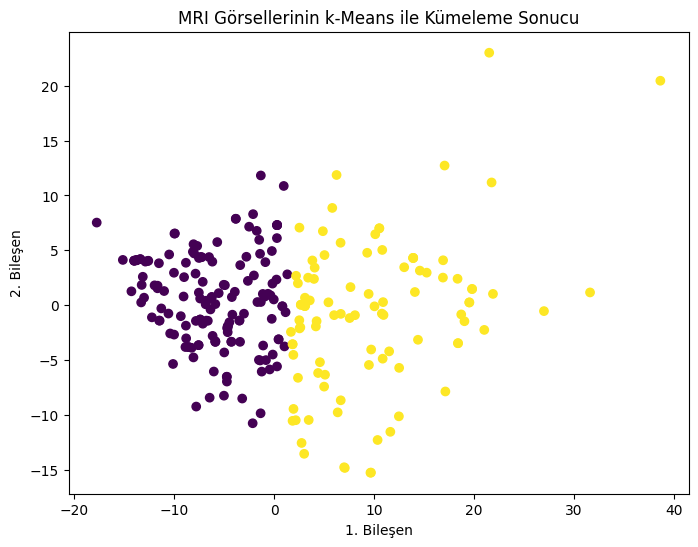

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("MRI Görsellerinin k-Means ile Kümeleme Sonucu")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.show()

Görseldeki dağılım grafiği, MRI görüntülerinin K-Means kümeleme algoritmasıyla iki farklı gruba ayrılmasının sonucunu açıkça göstermektedir. Grafik, veri noktalarını iki ana bileşen üzerinden konumlandırarak mor ve sarı renklerle temsil edilen iki belirgin kümenin varlığını ortaya koyar. Mor kümedeki noktalar genellikle sol tarafta daha yoğun ve birbirine yakın bir dağılım sergilerken, sarı kümedeki noktalar sağ tarafta daha geniş bir alana yayılmış ve mor kümeye kıyasla daha dağınık bir yapıdadır. Her ne kadar iki küme arasında genel bir ayrım gözlense de, özellikle "1. Bileşen"in sıfır civarındaki değerlerinde her iki kümeden de noktaların birbirine yaklaştığı ve hafif bir örtüşmenin olduğu alanlar bulunmaktadır; bu durum, bazı görüntülerin gruplar arası geçiş özellikleri taşıyabileceğini veya kümelemenin tam bir ayrım sağlayamadığını düşündürmektedir. Ayrıca, sarı kümede ana yoğunluktan belirgin şekilde uzaklaşan birkaç noktanın varlığı, potansiyel aykırı değerlerin varlığına işaret etmektedir. Genel olarak, bu grafik, K-Means'in veri setinizdeki doğal grupları yakalamada etkili olduğunu, ancak kümeler arasında tam bir keskinlik bulunmadığını ve bazı noktaların daha ileri analizi gerektirebileceğini göstermektedir.

# 🔍 Adım 5: Gerçek Etiketlerle Karşılaştırma (Analiz)

In [31]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, labels_kmeans)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.06849081251525613


In [33]:
np.savez("mri_data.npz", X=X, y=y)


In [35]:
import os
import numpy as np
from PIL import Image

# Kendi dizinine göre düzenle
yes_path =  r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\yes"
no_path = r"C:\Users\fatma\FatmaMakineOgrenmesi\archive\no"

IMG_SIZE = 100
X = []
y = []

# Tümörlü resimler
for img_name in os.listdir(yes_path):
    if img_name.endswith(".jpg"):
        img = Image.open(os.path.join(yes_path, img_name)).resize((IMG_SIZE, IMG_SIZE)).convert('L')
        X.append(np.array(img))
        y.append(1)

# Tümörsüz resimler
for img_name in os.listdir(no_path):
    if img_name.endswith(".jpg"):
        img = Image.open(os.path.join(no_path, img_name)).resize((IMG_SIZE, IMG_SIZE)).convert('L')
        X.append(np.array(img))
        y.append(0)

X = np.array(X)
y = np.array(y)

# .npy dosyalarına kaydet
np.save("X.npy", X)
np.save("y.npy", y)


In [36]:
import joblib

# Eğitilen modeli kaydet
joblib.dump(model_cpu, "model_cpu.pkl")


NameError: name 'model_cpu' is not defined